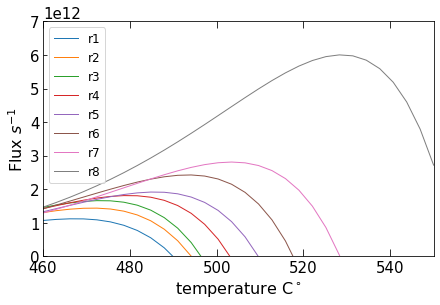

In [31]:
#********************************************************************
# Note: everything is converted to SI units unless printed otherwise
# takes into account the clamp
# looks at the flux vs temperature for each tube size
# plot is made yet it less annoying to change parameters
#********************************************************************

#Global Constants
kB = 1.38064852*10**(-23) # m^2 kg s^-2 K^-1 (boltzmann constant)
M  = 171*1.66054e-27      # mass of Yb in kg
sigma    = 1.5*10**(-19)  # cross sectional area of an atom

#Libraries
import matplotlib.pyplot as plt #plotting
import numpy as np
import matplotlib.pylab as pylab #plotting
import scipy.integrate as integrate #integrating
from numpy import sqrt, sin, cos, pi
from decimal import Decimal

#formatting plots
pylab.rcParams['figure.figsize'] = 7,7/1.62
pylab.rcParams['figure.autolayout'] = False
pylab.rcParams.update({'axes.labelsize': 20})
pylab.rcParams.update({'xtick.labelsize': 15})
pylab.rcParams.update({'ytick.labelsize': 15})
pylab.rcParams.update({'lines.linewidth': 1.0})
pylab.rcParams.update({'axes.titlesize': 20.0})

pylab.rcParams.update({'ytick.direction': 'in'}) 
pylab.rcParams.update({'xtick.major.size': 7})   
pylab.rcParams.update({'xtick.direction': 'in'}) 
pylab.rcParams.update({'xtick.top': True}) 
pylab.rcParams.update({'xtick.minor.bottom': True}) 

plt.ylabel('Flux $s^{-1}$',fontsize=16)
plt.xlabel('temperature C$^\circ$', fontsize=16)

#Set Parameters
lowT = 460 
hghT = 550
steps = 30
T_oven       = np.linspace(low, hgh, steps)   # range of the temperature of the oven in celcius   
len_algn_fud = 3                              # alignment fudge factor
h_clamp      = 2*10**(-3)                     # height of the clamp

#Dimensional Parameters of DPT (m)
R_DPT         = 2.5*10**(-3)             # radius of DPT
L_DPT         = 518*10**(-3)             # length from the end of nozzle to the end of DPT   


# outer diameter radius and inner array parameters picked from the sheet based on small wall thickness
rOD   = np.array([0.0425,0.0355,0.032,0.028,0.025,0.020,0.0163,0.008])*(0.0254/2) #conversion to meters and radius
rID   = np.array([0.035 ,0.031 ,0.029,0.024,0.020,0.016,0.0120,0.006])*(0.0254/2) #conversion to meters and radius
gauge = np.array(['19X','20XX','21XX','22XX','23XX','25XX','27X','33X'])          # gauges of corresponding radii

#*****************************************************************************************
# Calculating Dimensional Parameters
#*****************************************************************************************

# length and heigh calculation of the triangle
trngle_len    = 2*np.sqrt(3)*R_DPT       # length of the triangle to match DPT
h_trngle      = trngle_len*np.sqrt(3)/2  # height of the triangle to match DPT

# Number of tubes calculations
n             = trngle_len/(2*rOD)                          # number of tubes along the side of the triangle
N_tubes       = n*(n+1)/2                                   # number of tubes, triangular numbers formula

# Area calculations
A_open        = A_trngle - N_tubes*pi*(rOD**2 - rID**2)     # m^2, total open area of nozzle 
area_DPT      = pi*R_DPT**(2)                               # area of the DPT  
A_trngle      = (trngle_len**(2)*sqrt(3)/4)                 # area of triangle nozzle without tubes

# theta calculations
theta_DPT     = np.arctan(R_DPT/L_DPT)                      # maximum angle of atoms out of the DPT 
theta_DPT_fud = np.arctan(R_DPT/L_DPT_fud)                  # maximum angle with fudged length

#length of the tubes calculations
L_DPT_fud     = L_DPT/len_algn_fud                          # optimal length of tubes with fudge factor
L_opt         = rID/(np.tan(theta_DPT))                     # optimal length of tubes
L_opt_fud     = L_opt/len_algn_fud                          # fudged optimal length of tubes

# Ratios - solid angle and the area ratio
r_sld_angles_fud = (theta_DPT)**2/(theta_DPT_fud)**2        # Area Ratio of theta_DPT and theta_DPT_fud
area_ratio       = area_DPT/A_trngle                        # Area Ratio

# trapezoidal calculations for the clamp dimensions
clamp_lid_len = trngle_len + 2*h_clamp/(np.sqrt(3))
side_clamp    = np.sqrt(h_clamp**(2)+ h_clamp**(2)/3)

#*****************************************************************************************
# Calculating Temperature Parameters
#*****************************************************************************************

# Convert set temperature in Celcius to Kelvin
T = T_oven + 273

# Quantities which all Depend on temperature: pressure, density, velocity
P        = 10**(5.006 + 9.111 - 8111/T -1.0849*np.log10(T)) # pressure calculation
v_tilde  = np.sqrt(kB*T/M)                                  # convenient redefinition
n_0      = P/(kB*T)                                         # Number of atoms per Volume
v_mp     = np.sqrt(2)*v_tilde                               # most probable velocity
v_avg    = np.sqrt(8/(np.pi))*v_tilde                       # avergae velocity
v_rms    = np.sqrt(3)*v_tilde                               # root-mean-square velocity
MFP      = 1/(n_0*sigma)                                    # mean free path of the atoms

#*****************************************************************************************
# Flux Calculations
#*****************************************************************************************

# Integration
I       = integrate.quad(lambda x: sin(x)*cos(x)/2, 0, theta_DPT)     # integration for the ideal numbers
I_fud   = integrate.quad(lambda x: sin(x)*cos(x)/2, 0, theta_DPT_fud) # integration for the fudged numbers

Flux           = A_open[0]*v_mp*n_0*I[0]  
Flux1          = A_open[1]*v_mp*n_0*I[0] 
Flux2          = A_open[2]*v_mp*n_0*I[0] 
Flux3          = A_open[3]*v_mp*n_0*I[0] 
Flux4          = A_open[4]*v_mp*n_0*I[0] 
Flux5          = A_open[5]*v_mp*n_0*I[0] 
Flux6          = A_open[6]*v_mp*n_0*I[0] 
Flux7          = A_open[7]*v_mp*n_0*I[0] 

Flux_fud      = A_open[0]*v_mp*n_0*I_fud[0] 
Flux_fud1      = A_open[1]*v_mp*n_0*I_fud[0]
Flux_fud2      = A_open[2]*v_mp*n_0*I_fud[0]
Flux_fud3      = A_open[3]*v_mp*n_0*I_fud[0]
Flux_fud4      = A_open[4]*v_mp*n_0*I_fud[0]
Flux_fud5      = A_open[5]*v_mp*n_0*I_fud[0]
Flux_fud6      = A_open[6]*v_mp*n_0*I_fud[0]
Flux_fud7      = A_open[7]*v_mp*n_0*I_fud[0]

Flux_DPT_fud  = Flux_fud*r_sld_angles_fud*area_ratio
Flux_DPT_fud1  = Flux_fud1*r_sld_angles_fud*area_ratio
Flux_DPT_fud2  = Flux_fud2*r_sld_angles_fud*area_ratio
Flux_DPT_fud3  = Flux_fud3*r_sld_angles_fud*area_ratio
Flux_DPT_fud4  = Flux_fud4*r_sld_angles_fud*area_ratio
Flux_DPT_fud5  = Flux_fud5*r_sld_angles_fud*area_ratio
Flux_DPT_fud6  = Flux_fud6*r_sld_angles_fud*area_ratio
Flux_DPT_fud7  = Flux_fud7*r_sld_angles_fud*area_ratio


f1   = L_opt_fud[0]/MFP
f2   = L_opt_fud[1]/MFP
f3   = L_opt_fud[2]/MFP
f4   = L_opt_fud[3]/MFP
f5   = L_opt_fud[4]/MFP
f6   = L_opt_fud[5]/MFP
f7   = L_opt_fud[6]/MFP
f8   = L_opt_fud[7]/MFP



fraction_Flux = Flux_DPT_fud - f1*Flux_DPT_fud 
fraction_Flux1 = Flux_DPT_fud1 - f2*Flux_DPT_fud1 
fraction_Flux2 = Flux_DPT_fud2 - f3*Flux_DPT_fud2 
fraction_Flux3 = Flux_DPT_fud3 - f4*Flux_DPT_fud3 
fraction_Flux4 = Flux_DPT_fud4 - f5*Flux_DPT_fud4 
fraction_Flux5 = Flux_DPT_fud5 - f6*Flux_DPT_fud5 
fraction_Flux6 = Flux_DPT_fud6 - f7*Flux_DPT_fud6 
fraction_Flux7 = Flux_DPT_fud7 - f8*Flux_DPT_fud7 

plt.plot(T_oven,fraction_Flux, label='r1')
plt.plot(T_oven,fraction_Flux1, label='r2')
plt.plot(T_oven,fraction_Flux2, label='r3')
plt.plot(T_oven,fraction_Flux3, label='r4')
plt.plot(T_oven,fraction_Flux4, label='r5')
plt.plot(T_oven,fraction_Flux5, label='r6')
plt.plot(T_oven,fraction_Flux6, label='r7')
plt.plot(T_oven,fraction_Flux7, label='r8')



# minimum and maximum values on the plot
plt.ylim(ymin=0,ymax=.7*10**(13))
plt.xlim(xmin=lowT,xmax=hghT)

plt.legend(fontsize=12)
pylab.savefig('FluxvsTemp.pdf', format='pdf', dpi=1000,bbox_inches='tight')